### Importing the required libraries

In [2]:
# Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as la

# Transformers libraries
import torch
import transformers
from transformers import AutoTokenizer, AutoModelForCausalLM

from my_functions import svd

In [3]:
def n_component(v, percent = 80):
    
    N = v.shape[0]
    U, spectrum, Vt = la.svd(v)
    l_svd = (spectrum ** 2)/(N-1)
    V_svd = U

    values = np.cumsum(l_svd/sum(l_svd)*100)

    diff = np.abs(values - percent)

    return np.argmin(diff)

#### Captain

In [4]:
module_name = ["AttentionProj", "SecondLayerNN"]

components_75_captain = []
components_80_captain = []
components_85_captain = []
components_90_captain = []
components_95_captain = []

for i in range(1,13):
    print('Step ', i)
    for mn in module_name:
        v = torch.load("/mnt/DATA/output_Captain/decoder/decoder_" + str(i) + "/" + mn + ".pt").detach().numpy()[0,]
        components_75_captain.append(n_component(v, percent = 75))
        components_80_captain.append(n_component(v, percent = 80))
        components_85_captain.append(n_component(v, percent = 85))
        components_90_captain.append(n_component(v, percent = 90))
        components_95_captain.append(n_component(v, percent = 95))
v.shape

Step  1
Step  2
Step  3
Step  4
Step  5
Step  6
Step  7
Step  8
Step  9
Step  10
Step  11
Step  12


(308, 768)

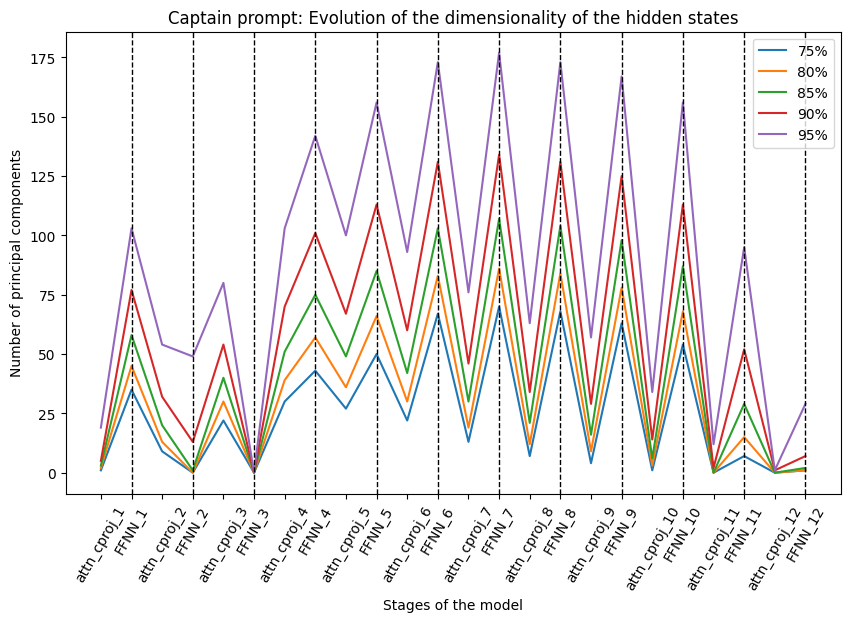

In [5]:
fig = plt.figure(figsize=(10, 6))

plt.plot(components_75_captain, label = "75%")
plt.plot(components_80_captain, label = "80%")
plt.plot(components_85_captain, label = "85%")
plt.plot(components_90_captain, label = "90%")
plt.plot(components_95_captain, label = "95%")

x_tick_labels = []
for i in range(1, 13, 1):
    x_tick_labels.append(f"attn_cproj_{i}")
    x_tick_labels.append(f"FFNN_{i}")

for i in np.arange(0, 24, 2):
    plt.axvline(x=i+1, color='black', linestyle='--', linewidth=1)

plt.xticks([i for i in range(0,24)], x_tick_labels, rotation=60)

plt.title("Captain prompt: Evolution of the dimensionality of the hidden states")
plt.xlabel("Stages of the model")
plt.ylabel("Number of principal components")
plt.legend()
plt.show()

In [6]:
module_name = ["AttentionPlusResidual", "Decoder_Final_Output"]

components_75_captain_skip = []
components_80_captain_skip = []
components_85_captain_skip = []
components_90_captain_skip = []
components_95_captain_skip = []

for i in range(1,13):
    print('Step ', i)
    for mn in module_name:
        v = torch.load("/mnt/DATA/output_Captain/decoder/decoder_" + str(i) + "/" + mn + ".pt")[0].detach().numpy()[0,]
        components_75_captain_skip.append(n_component(v, percent = 75))
        components_80_captain_skip.append(n_component(v, percent = 80))
        components_85_captain_skip.append(n_component(v, percent = 85))
        components_90_captain_skip.append(n_component(v, percent = 90))
        components_95_captain_skip.append(n_component(v, percent = 95))

Step  1
Step  2
Step  3
Step  4
Step  5
Step  6
Step  7
Step  8
Step  9
Step  10
Step  11
Step  12


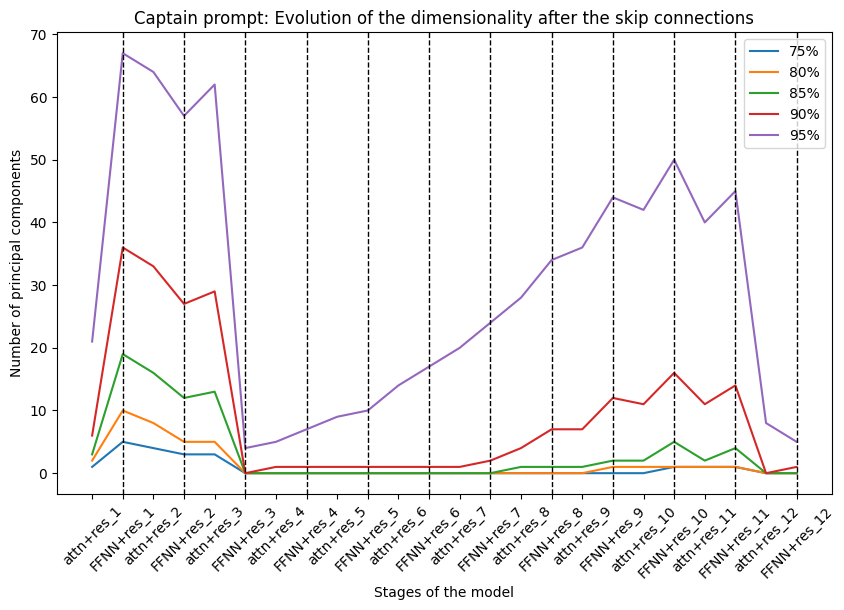

In [7]:
fig = plt.figure(figsize=(10, 6))

plt.plot(components_75_captain_skip, label = "75%")
plt.plot(components_80_captain_skip, label = "80%")
plt.plot(components_85_captain_skip, label = "85%")
plt.plot(components_90_captain_skip, label = "90%")
plt.plot(components_95_captain_skip, label = "95%")

x_tick_labels = []
for i in range(1, 13, 1):
    x_tick_labels.append(f"attn+res_{i}")
    x_tick_labels.append(f"FFNN+res_{i}")
plt.xticks([i for i in range(0,24)], x_tick_labels, rotation=45)

for i in np.arange(0, 24, 2):
    plt.axvline(x=i+1, color='black', linestyle='--', linewidth=1)

plt.title("Captain prompt: Evolution of the dimensionality after the skip connections")
plt.xlabel("Stages of the model")
plt.ylabel("Number of principal components")
plt.legend()
plt.show()

#### Cats

In [8]:
module_name = ["AttentionProj", "SecondLayerNN"]

components_75_cats = []
components_80_cats = []
components_85_cats = []
components_90_cats = []
components_95_cats = []

for i in range(1,13):
    print('Step ', i)
    for mn in module_name:
        v = torch.load("/mnt/DATA/output_Cats/decoder/decoder_" + str(i) + "/" + mn + ".pt").detach().numpy()[0,]
        components_75_cats.append(n_component(v, percent = 75))
        components_80_cats.append(n_component(v, percent = 80))
        components_85_cats.append(n_component(v, percent = 85))
        components_90_cats.append(n_component(v, percent = 90))
        components_95_cats.append(n_component(v, percent = 95))
v.shape

Step  1
Step  2
Step  3
Step  4
Step  5
Step  6
Step  7
Step  8
Step  9
Step  10
Step  11
Step  12


(559, 768)

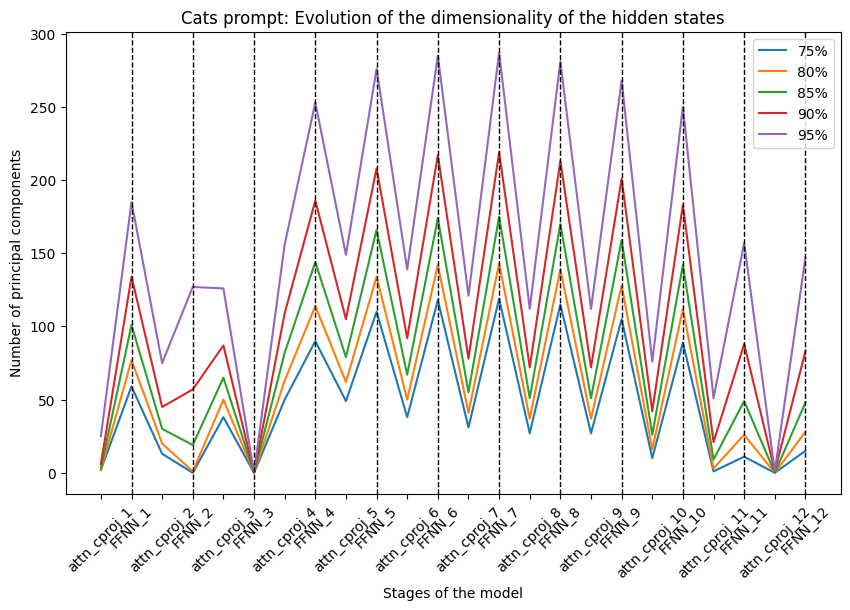

In [9]:
fig = plt.figure(figsize=(10, 6))

plt.plot(components_75_cats, label = "75%")
plt.plot(components_80_cats, label = "80%")
plt.plot(components_85_cats, label = "85%")
plt.plot(components_90_cats, label = "90%")
plt.plot(components_95_cats, label = "95%")

x_tick_labels = []
for i in range(1, 13, 1):
    x_tick_labels.append(f"attn_cproj_{i}")
    x_tick_labels.append(f"FFNN_{i}")

for i in np.arange(0, 24, 2):
    plt.axvline(x=i+1, color='black', linestyle='--', linewidth=1)

plt.xticks([i for i in range(0,24)], x_tick_labels, rotation=45)

plt.title("Cats prompt: Evolution of the dimensionality of the hidden states")
plt.xlabel("Stages of the model")
plt.ylabel("Number of principal components")

plt.legend()
plt.show()

Let's look at the evolution of the dimensionality of the space for just the passages Attention+Residual and FFNN+Residual

In [10]:
module_name = ["AttentionPlusResidual", "Decoder_Final_Output"]

components_75_cats_skip = []
components_80_cats_skip = []
components_85_cats_skip = []
components_90_cats_skip = []
components_95_cats_skip = []

for i in range(1,13):
    for mn in module_name:
        v = torch.load("/mnt/DATA/output_Cats/decoder/decoder_" + str(i) + "/" + mn + ".pt")[0][0].detach().numpy()
        components_75_cats_skip.append(n_component(v, percent = 75))
        components_80_cats_skip.append(n_component(v, percent = 80))
        components_85_cats_skip.append(n_component(v, percent = 85))
        components_90_cats_skip.append(n_component(v, percent = 90))
        components_95_cats_skip.append(n_component(v, percent = 95))

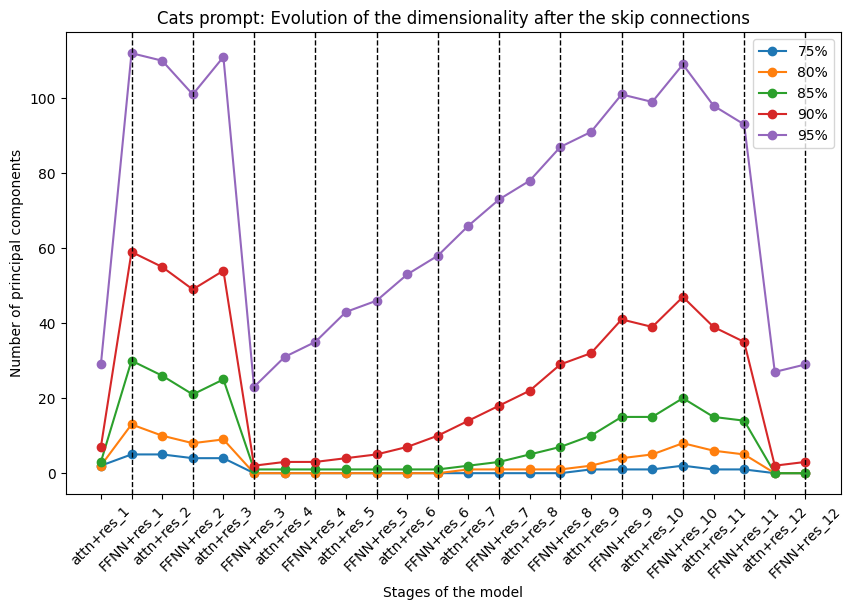

In [18]:
fig = plt.figure(figsize=(10, 6))

plt.plot(components_75_cats_skip, label = "75%", marker="o")
plt.plot(components_80_cats_skip, label = "80%", marker="o")
plt.plot(components_85_cats_skip, label = "85%", marker="o")
plt.plot(components_90_cats_skip, label = "90%", marker="o")
plt.plot(components_95_cats_skip, label = "95%", marker="o")


x_tick_labels = []
for i in range(1, 13, 1):
    x_tick_labels.append(f"attn+res_{i}")
    x_tick_labels.append(f"FFNN+res_{i}")
plt.xticks([i for i in range(0,24)], x_tick_labels, rotation=45)

for i in np.arange(0, 24, 2):
    plt.axvline(x=i+1, color='black', linestyle='--', linewidth=1)

plt.title("Cats prompt: Evolution of the dimensionality after the skip connections")
plt.xlabel("Stages of the model")
plt.ylabel("Number of principal components")

plt.legend()
plt.show()

#### GEB

In [12]:
module_name = ["AttentionProj", "SecondLayerNN"]

components_75_GEB = []
components_80_GEB = []
components_85_GEB = []
components_90_GEB = []
components_95_GEB = []

for i in range(1,13):
    print('Step ', i)
    for mn in module_name:
        v = torch.load("/mnt/DATA/output_GEB/decoder/decoder_" + str(i) + "/" + mn + ".pt").detach().numpy()[0,]
        components_75_GEB.append(n_component(v, percent = 75))
        components_80_GEB.append(n_component(v, percent = 80))
        components_85_GEB.append(n_component(v, percent = 85))
        components_90_GEB.append(n_component(v, percent = 90))
        components_95_GEB.append(n_component(v, percent = 95))
v.shape

Step  1
Step  2
Step  3
Step  4
Step  5
Step  6
Step  7
Step  8
Step  9
Step  10
Step  11
Step  12


(997, 768)

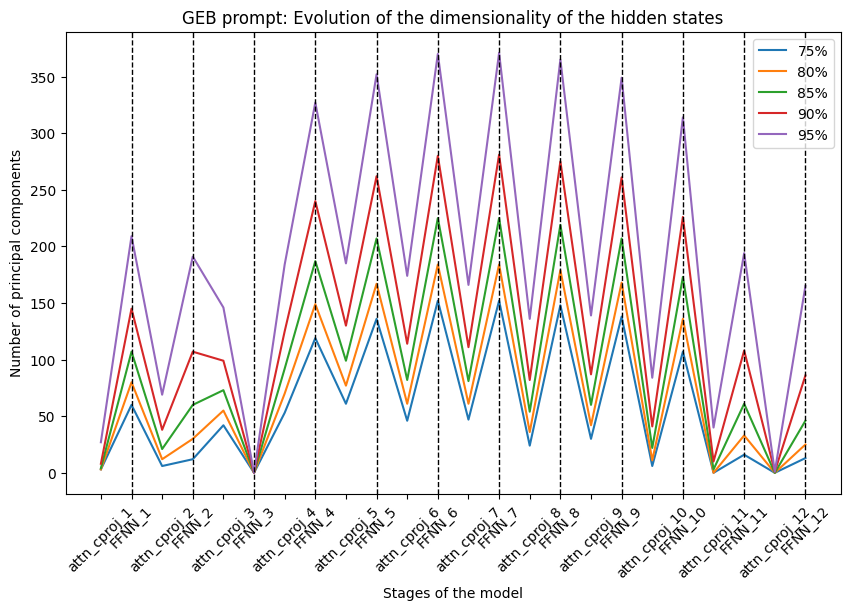

In [14]:
fig = plt.figure(figsize=(10, 6))

plt.plot(components_75_GEB, label = "75%")
plt.plot(components_80_GEB, label = "80%")
plt.plot(components_85_GEB, label = "85%")
plt.plot(components_90_GEB, label = "90%")
plt.plot(components_95_GEB, label = "95%")

x_tick_labels = []
for i in range(1, 13, 1):
    x_tick_labels.append(f"attn_cproj_{i}")
    x_tick_labels.append(f"FFNN_{i}")
    
for i in np.arange(0, 24, 2):
    plt.axvline(x=i+1, color='black', linestyle='--', linewidth=1)

plt.title("GEB prompt: Evolution of the dimensionality of the hidden states")
plt.xlabel("Stages of the model")
plt.ylabel("Number of principal components")

plt.xticks([i for i in range(0,24)], x_tick_labels, rotation=45)
plt.legend()
plt.show()

Let's look at the evolution of the dimensionality of the space for just the passages Attention+Residual and FFNN+Residual

In [15]:
module_name = ["AttentionPlusResidual", "Decoder_Final_Output"]

components_75_GEB_skip = []
components_80_GEB_skip = []
components_85_GEB_skip = []
components_90_GEB_skip = []
components_95_GEB_skip = []

for i in range(1,13):
    for mn in module_name:
        v = torch.load("/mnt/DATA/output_GEB/decoder/decoder_" + str(i) + "/" + mn + ".pt")[0][0].detach().numpy()
        components_75_GEB_skip.append(n_component(v, percent = 75))
        components_80_GEB_skip.append(n_component(v, percent = 80))
        components_85_GEB_skip.append(n_component(v, percent = 85))
        components_90_GEB_skip.append(n_component(v, percent = 90))
        components_95_GEB_skip.append(n_component(v, percent = 95))

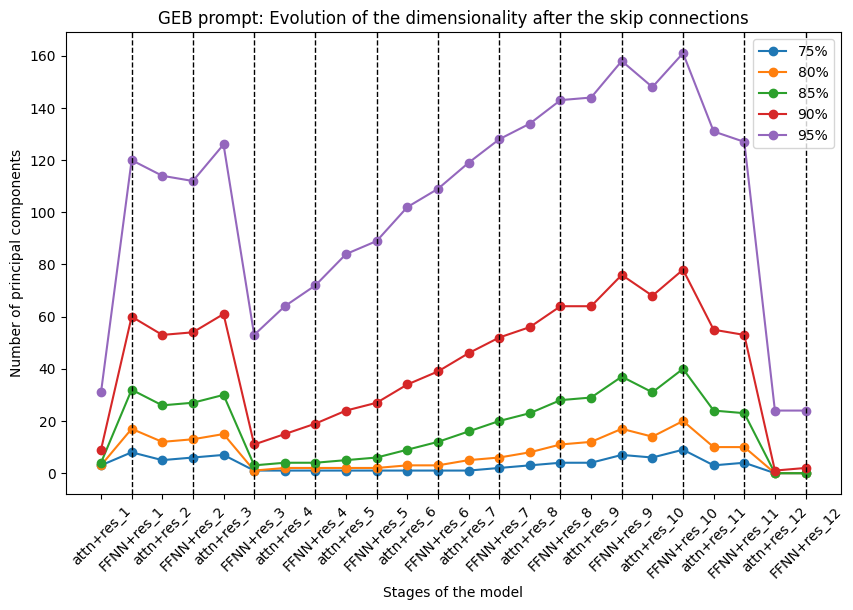

In [20]:
fig = plt.figure(figsize=(10, 6))

plt.plot(components_75_GEB_skip, label = "75%", marker="o")
plt.plot(components_80_GEB_skip, label = "80%", marker="o")
plt.plot(components_85_GEB_skip, label = "85%", marker="o")
plt.plot(components_90_GEB_skip, label = "90%", marker="o")
plt.plot(components_95_GEB_skip, label = "95%", marker="o")

x_tick_labels = []
for i in range(1, 13, 1):
    x_tick_labels.append(f"attn+res_{i}")
    x_tick_labels.append(f"FFNN+res_{i}")
plt.xticks([i for i in range(0,24)], x_tick_labels, rotation=45)

for i in np.arange(0, 24, 2):
    plt.axvline(x=i+1, color='black', linestyle='--', linewidth=1)
    
plt.title("GEB prompt: Evolution of the dimensionality after the skip connections")
plt.xlabel("Stages of the model")
plt.ylabel("Number of principal components")

plt.legend()
plt.show()